In [ ]:


import numpy as np
import pandas as pd 

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# mitbih_test-.csv
! gdown "12Os4Ip3WanpBc0f1JWrDXD21CO0HkFFe"

# mitbih_train.zip
! gdown "1Ew0TTlPuHhQeLKRdU8VELcNU_m2Nqsh1" 
! unzip mitbih_train.zip


Downloading...
From: https://drive.google.com/uc?id=12Os4Ip3WanpBc0f1JWrDXD21CO0HkFFe
To: /content/mitbih_test.csv
100% 103M/103M [00:00<00:00, 169MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Ew0TTlPuHhQeLKRdU8VELcNU_m2Nqsh1
To: /content/mitbih_train.zip
100% 18.3M/18.3M [00:00<00:00, 130MB/s] 
Archive:  mitbih_train.zip
  inflating: mitbih_train.csv        


In [ ]:
# import dataset
train_df = pd.read_csv("mitbih_train.csv", header = None)
test_df = pd.read_csv("mitbih_test.csv", header = None)

In [ ]:
train_df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

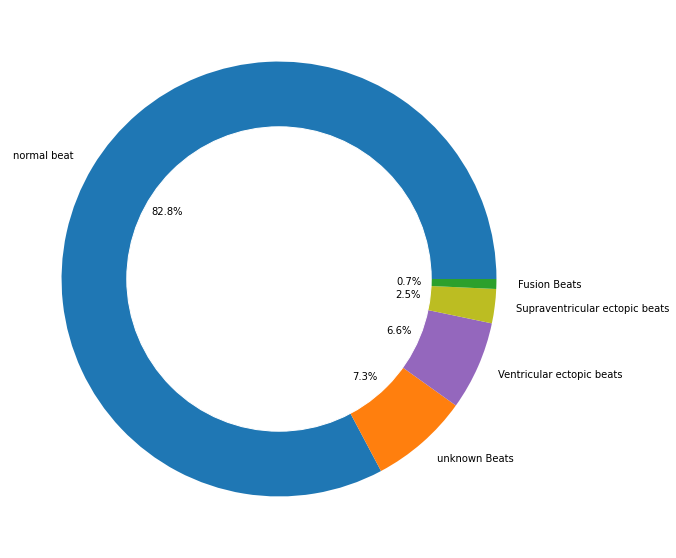

In [ ]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

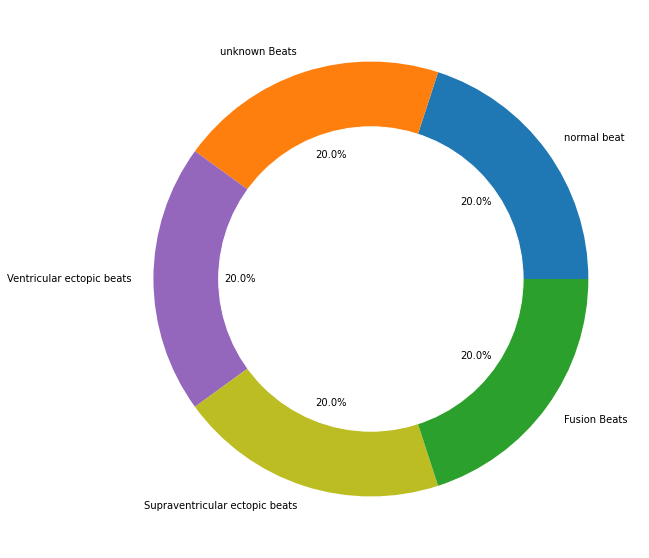

In [ ]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# randomly sampling from each class
classes=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
# peek on classes
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
873,1.000,0.552,0.336,0.216,0.1400,0.0789,0.0433,0.0483,0.0305,0.0204,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
73291,1.000,0.941,0.314,0.000,0.0745,0.1530,0.1180,0.1330,0.2120,0.2000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0
75482,0.568,0.522,0.311,0.000,0.0528,0.0932,0.1150,0.1650,0.1550,0.1550,...,0.366,0.382,0.373,0.382,0.376,0.385,0.382,0.394,0.388,2.0
81104,1.000,0.870,0.622,0.292,0.0693,0.0870,0.0924,0.0611,0.0476,0.0408,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0
83491,0.881,0.532,0.519,0.491,0.4570,0.4060,0.3650,0.3040,0.2320,0.0956,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.0


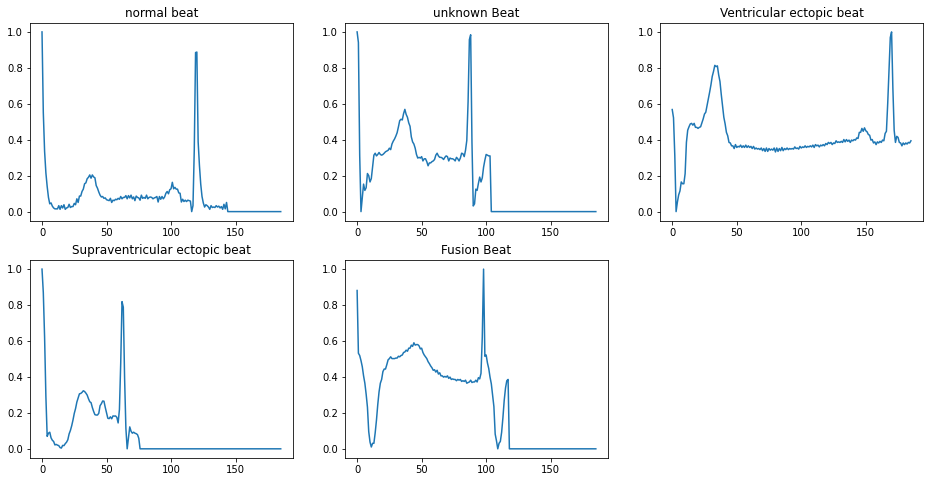

In [ ]:
# plotting classes ECG
plt.figure(figsize=(16,8))
# normal
plt.subplot(2, 3, 1)  
plt.plot(classes.iloc[0,:186])
plt.title('normal beat')
# unknown
plt.subplot(2, 3, 2)  
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
# veb
plt.subplot(2, 3, 3)  
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
# seb
plt.subplot(2, 3, 4)  
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
# fusion
plt.subplot(2, 3, 5)  
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
# show plot
plt.show()

In [ ]:
def plot_hist(class_number,size,min_):
    # get the class data
    img=train_df.loc[train_df[187]==class_number].values
    # crop it
    img=img[:,min_:size]
    # creates a continous steam of data
    img_flatten=img.flatten()
    
    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


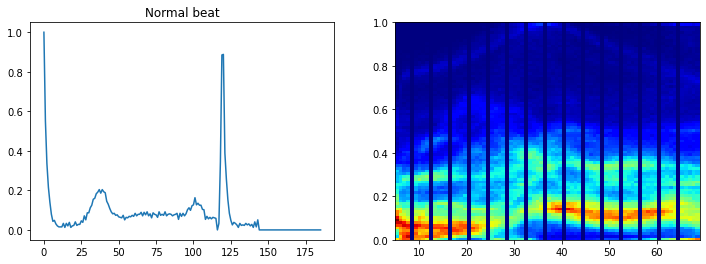

In [ ]:
# Normal Beat
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(classes.iloc[0,:186])
plt.title('Normal beat')
plt.subplot(1, 2, 2)  
plot_hist(0,70,5)

900000
900000


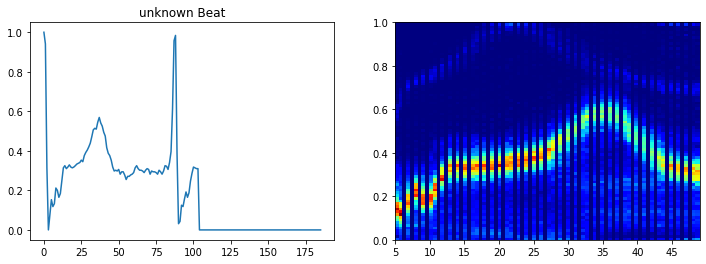

In [ ]:
# unknown
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
plt.subplot(1, 2, 2)  
plot_hist(1,50,5)

600000
600000


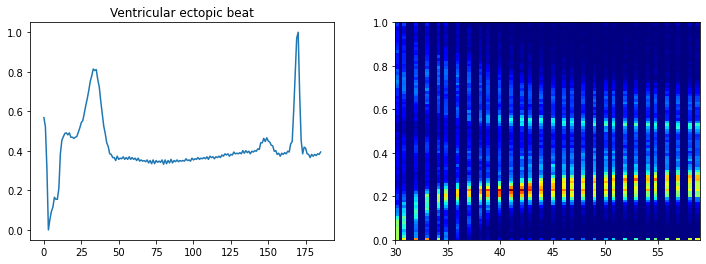

In [ ]:
# veb
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(2,60,30)

700000
700000


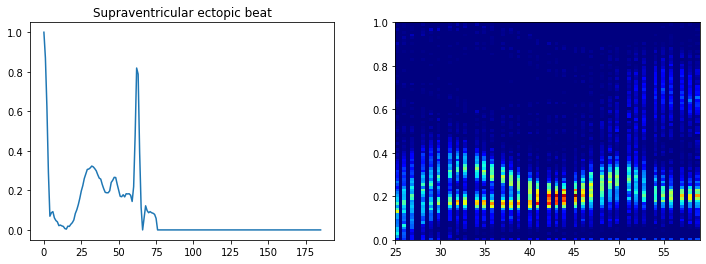

In [ ]:
# seb
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1) 
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(3,60,25)

640000
640000


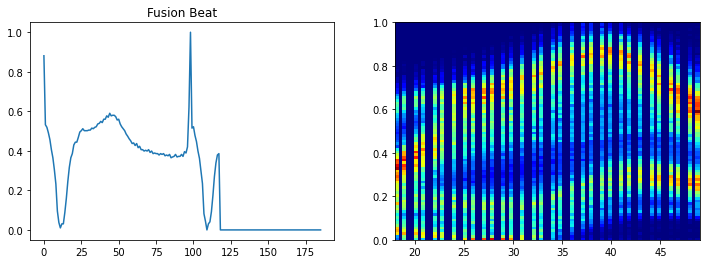

In [ ]:
# fusion
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)   
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
plt.subplot(1, 2, 2) 
plot_hist(4,50,18)

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

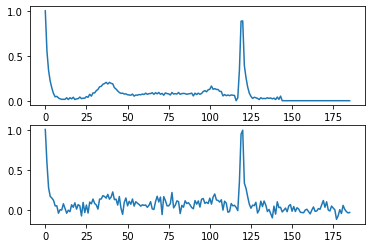

In [ ]:
tempo=classes.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(classes.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
# Network
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=5,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
# from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
# from keras.layers import Input
# from keras.models import Model
# from tensorflow.keras.layers import BatchNormalization
# import keras
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# model,history=network(X_train,y_train,X_test,y_test)

In [ ]:
# evaluate_model(history,X_test,y_test,model)
# y_pred=model.predict(X_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(10, 10))
# plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
#                       title='Confusion matrix, with normalization')
# plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
encoder = preprocessing.LabelEncoder()
encoder.fit(target_train)
Y_train = encoder.transform(target_train)
encoder.fit(target_test)
Y_test = encoder.transform(target_test)

In [ ]:
nsamples, nx, ny = X_train.shape
train_dataset = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
test_dataset = X_test.reshape((nsamples,nx*ny))

In [ ]:
accu = []
prec = []
recc = []
f1   = []
models =[]

In [ ]:
ytest = Y_test

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 100).fit(train_dataset, Y_train)
dt_pred = dtree_model.predict(test_dataset)
  
# creating a confusion matrix
#cm = confusion_matrix(Y_test, dtree_predictions)


accuracy_score(Y_test, dt_pred)#, normalize=False)

0.9282843047688654

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, dt_pred)))
print('Precision Score : ' + str(precision_score(ytest,dt_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,dt_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,dt_pred,average='macro')))

# Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,dt_pred)))


accu.append(accuracy_score(ytest, dt_pred))
prec.append(precision_score(ytest,dt_pred,average='macro'))
recc.append(recall_score(ytest,dt_pred,average='macro'))
f1.append(f1_score(ytest,dt_pred,average='macro'))
models.append("Decision Tree" )

Accuracy Score : 0.9282843047688654
Precision Score : 0.705478723052247
Recall Score : 0.8354083679715913
F1 Score : 0.7580239467311252
Confusion Matrix : 
[[17013   485   341    95   184]
 [  129   400    15     5     7]
 [  107    17  1278    25    21]
 [   29     3    17   112     1]
 [   53    12    22     2  1519]]


In [ ]:
clf = LogisticRegression(random_state=0).fit(train_dataset, Y_train)
lr_pred = clf.predict(test_dataset)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, lr_pred)))
print('Precision Score : ' + str(precision_score(ytest,lr_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,lr_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,lr_pred,average='macro')))

# Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,lr_pred)))



accu.append(accuracy_score(ytest, lr_pred))
prec.append(precision_score(ytest,lr_pred,average='macro'))
recc.append(recall_score(ytest,lr_pred,average='macro'))
f1.append(f1_score(ytest,lr_pred,average='macro'))
models.append("Logistic Regression" )

Accuracy Score : 0.6625251233327243
Precision Score : 0.4422123281549343
Recall Score : 0.7608034568119384
F1 Score : 0.473178038769448
Confusion Matrix : 
[[11486  2166  2556  1441   469]
 [  131   368    31    20     6]
 [  142    51  1047   159    49]
 [    9     0    11   142     0]
 [   47     5    86     9  1461]]


In [ ]:
gnb = GaussianNB()
nb_pred = gnb.fit(train_dataset, Y_train).predict(test_dataset)


accuracy_score(ytest,nb_pred)

0.188927462086607

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, nb_pred)))
print('Precision Score : ' + str(precision_score(ytest,nb_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,nb_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,nb_pred,average='macro')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,nb_pred)))

Accuracy Score : 0.188927462086607
Precision Score : 0.33637100260264113
Recall Score : 0.4591069942532508
F1 Score : 0.17838345657124227
Confusion Matrix : 
[[ 2041   108  1165  2496 12308]
 [   37    80    38    55   346]
 [  118     9   289    89   943]
 [    0     0     1   138    23]
 [    1     0     5    14  1588]]


In [ ]:
accu.append(accuracy_score(ytest, nb_pred))
prec.append(precision_score(ytest,nb_pred,average='macro'))
recc.append(recall_score(ytest,nb_pred,average='macro'))
f1.append(f1_score(ytest,nb_pred,average='macro'))
models.append("Gaussian naive_bayes" )

In [ ]:
RF = RandomForestClassifier().fit(train_dataset, Y_train)
rf_pred = RF.predict(test_dataset)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, rf_pred)))
print('Precision Score : ' + str(precision_score(ytest,rf_pred,average='macro')))
print('Recall Score : ' + str(recall_score(ytest,rf_pred,average='macro')))
print('F1 Score : ' + str(f1_score(ytest,rf_pred,average='macro')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,rf_pred)))

Accuracy Score : 0.9766581399598027
Precision Score : 0.9087265806221186
Recall Score : 0.8731856159546971
F1 Score : 0.8901734243889459
Confusion Matrix : 
[[17946    86    56    12    18]
 [  140   413     2     0     1]
 [   72     4  1349    16     7]
 [   28     0    15   119     0]
 [   49     0     5     0  1554]]


In [ ]:
accu.append(accuracy_score(ytest, rf_pred))
prec.append(precision_score(ytest,rf_pred,average='macro'))
recc.append(recall_score(ytest,rf_pred,average='macro'))
f1.append(f1_score(ytest,rf_pred,average='macro'))
models.append("Random forrest" )

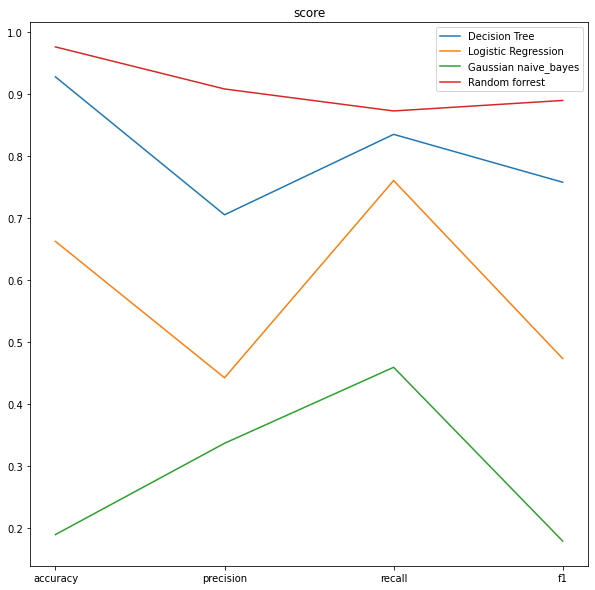

In [ ]:
# create data
#x = [1,2,3,4]
x = ['accuracy','precision','recall','f1']
plt.figure(figsize=(10,10))
plt.title('score')
# plot lines
for i in range(len(accu)):
    plt.plot(x,[accu[i],prec[i],recc[i],f1[i]], label = models[i])
plt.legend()
plt.savefig('curves.png')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

In [ ]:
# score_means = list()
# score_stds = list()
# percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

# for percentile in percentiles:
#     print(percentile)
#     clf.set_params(anova__percentile=percentile)
#     this_scores = cross_val_score(clf, train_dataset, Y_train)
#     score_means.append(this_scores.mean())
#     score_stds.append(this_scores.std())

In [ ]:
# plt.errorbar(percentiles, score_means, np.array(score_stds))
# plt.title(
#     'Performance of the SVM-Anova varying the percentile of features selected')
# plt.xticks(np.linspace(0, 100, 11, endpoint=True))
# plt.xlabel('Percentile')
# plt.ylabel('Accuracy Score')
# plt.axis('tight')
# plt.show()

In [ ]:
train_dataset[:2][:]


array([[0.163 , 0.541 , 0.756 , 0.186 , 0.169 , 0.547 , 0.616 , 0.698 ,
        0.651 , 0.703 , 0.68  , 0.733 , 0.721 , 0.756 , 0.75  , 0.779 ,
        0.762 , 0.814 , 0.762 , 0.791 , 0.779 , 0.814 , 0.802 , 0.849 ,
        0.808 , 0.843 , 0.837 , 0.855 , 0.843 , 0.913 , 0.924 , 0.965 ,
        0.942 , 1.    , 0.959 , 0.948 , 0.884 , 0.89  , 0.837 , 0.826 ,
        0.756 , 0.762 , 0.703 , 0.703 , 0.68  , 0.715 , 0.68  , 0.721 ,
        0.709 , 0.727 , 0.692 , 0.703 , 0.68  , 0.698 , 0.68  , 0.709 ,
        0.68  , 0.715 , 0.669 , 0.692 , 0.651 , 0.674 , 0.628 , 0.68  ,
        0.645 , 0.669 , 0.634 , 0.64  , 0.605 , 0.634 , 0.599 , 0.628 ,
        0.605 , 0.628 , 0.605 , 0.64  , 0.605 , 0.616 , 0.57  , 0.61  ,
        0.581 , 0.622 , 0.57  , 0.616 , 0.628 , 0.657 , 0.645 , 0.669 ,
        0.686 , 0.645 , 0.581 , 0.628 , 0.587 , 0.628 , 0.599 , 0.564 ,
        0.529 , 0.547 , 0.517 , 0.541 , 0.512 , 0.552 , 0.512 , 0.541 ,
        0.523 , 0.576 , 0.593 , 0.703 , 0.477 , 0.25  , 0.    , 

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(kernel='linear',max_iter=1000,verbose=True), params_grid, cv=5)
svm_model.fit(train_dataset, Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

KeyboardInterrupt: ignored

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
svm_pred = final_model.predict(test_dataset)
Y_pred_label = list(encoder.inverse_transform(svm_pred))

In [ ]:
accuracy_score(Y_test, Y_pred_label)

In [ ]:
svm_lin = SVC(kernel='linear',C=10,max_iter=10000,verbose=True).fit(train_dataset, Y_train)

In [ ]:
svm_pred1 = svm_lin.predict(test_dataset)
#accuracy_score(Y_test, svm_pred1)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, svm_pred1)))
print('Precision Score : ' + str(precision_score(ytest,svm_pred1,average='weighted')))
print('Recall Score : ' + str(recall_score(ytest,svm_pred1,average='weighted')))
print('F1 Score : ' + str(f1_score(ytest,svm_pred1,average='weighted')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,svm_pred2)))

In [ ]:
accu.append(accuracy_score(ytest, svm_pred1))
prec.append(precision_score(ytest,svm_pred1,average='weighted'))
recc.append(recall_score(ytest,svm_pred1,average='weighted'))
f1.append(f1_score(ytest,svm_pred1,average='weighted'))
models.append("linear SVM" )

In [ ]:
svm_pol = SVC(kernel='poly',C=10,max_iter=10000,verbose=True).fit(train_dataset, Y_train)

In [ ]:
svm_pred2 = svm_pol.predict(test_dataset)
#accuracy_score(Y_test, svm_pred2)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, svm_pred2)))
print('Precision Score : ' + str(precision_score(ytest,svm_pred2,average='weighted')))
print('Recall Score : ' + str(recall_score(ytest,svm_pred2,average='weighted')))
print('F1 Score : ' + str(f1_score(ytest,svm_pred2,average='weighted')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,svm_pred2)))

In [ ]:
accu.append(accuracy_score(ytest, svm_pred2))
prec.append(precision_score(ytest,svm_pred2,average='weighted'))
recc.append(recall_score(ytest,svm_pred2,average='weighted'))
f1.append(f1_score(ytest,svm_pred2,average='weighted'))
models.append("polynomial SVM" )

In [ ]:
svm_rbf = SVC(kernel='rbf',C=10,max_iter=10000,verbose=True).fit(train_dataset, Y_train)

In [ ]:
svm_pred3 = svm_rbf.predict(test_dataset)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, svm_pred3)))
print('Precision Score : ' + str(precision_score(ytest,svm_pred3,average='weighted')))
print('Recall Score : ' + str(recall_score(ytest,svm_pred3,average='weighted')))
print('F1 Score : ' + str(f1_score(ytest,svm_pred3,average='weighted')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,svm_pred3)))

In [ ]:
accu.append(accuracy_score(ytest, svm_pred3))
prec.append(precision_score(ytest,svm_pred3,average='weighted'))
recc.append(recall_score(ytest,svm_pred3,average='weighted'))
f1.append(f1_score(ytest,svm_pred3,average='weighted'))
models.append("rbf SVM" )

In [ ]:
svm_sig = SVC(kernel='sigmoid',C=10,max_iter=10000,verbose=True).fit(train_dataset, Y_train)

In [ ]:
svm_pred4 = svm_sig.predict(test_dataset)
#accuracy_score(Y_test, svm_pred4)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(ytest, svm_pred4)))
print('Precision Score : ' + str(precision_score(ytest,svm_pred4,average='weighted')))
print('Recall Score : ' + str(recall_score(ytest,svm_pred4,average='weighted')))
print('F1 Score : ' + str(f1_score(ytest,svm_pred4,average='weighted')))

#Dummy Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(ytest,svm_pred4)))

In [ ]:
accu.append(accuracy_score(ytest, svm_pred4))
prec.append(precision_score(ytest,svm_pred4,average='weighted'))
recc.append(recall_score(ytest,svm_pred4,average='weighted'))
f1.append(f1_score(ytest,svm_pred4,average='weighted'))
models.append("sigmoid SVM" )

In [ ]:
# create data
#x = [1,2,3,4]
x = ['accuracy','precision','recall','f1']
plt.figure(figsize=(10,10))
plt.title('score')
# plot lines
for i in range(4):
    plt.plot(x,[accu[i],prec[i],recc[i],f1[i]], label = models[i])
for i in range(4,8):
    plt.plot(x,[accu[i],prec[i],recc[i],f1[i]], label = models[i],linestyle='dashed')
plt.legend()
plt.savefig('curves.png')
plt.show()

In [ ]:
scores = pd.DataFrame({'model':models,'accuracy':accu,'precision':prec,'recall':recc,'f1 score' :f1})

In [ ]:
scores.to_csv('scores.csv')

In [ ]:
scores

,model,accuracy,precision,recall,f1 score
0,Decision Tree,0.928284,0.705479,0.835408,0.758024
1,Logistic Regression,0.662525,0.442212,0.760803,0.473178
2,Gaussian naive_bayes,0.188927,0.336371,0.459107,0.178383
3,Random forrest,0.976658,0.908727,0.873186,0.890173
